In [55]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
pd.options.display.float_format = '{:,.0f}'.format
import seaborn as sns

In [157]:
np.random.rand()

0.5816696318153359

In [227]:
exper = np.random.randint(1, 20, 100)
len(exper)

100

In [228]:
age = np.random.randint(21, 77, 100)

In [229]:
iq = ((1+(np.random.rand(100) - 0.5)) * 100 + exper).round()

In [230]:
# salary = (np.random.rand(100) * (exper * 12) + 20000).round()
salary = ((np.random.rand(100) * 100000) + (exper * 4000) - (iq * 800) + 20000).round()
len(salary)

100

In [231]:
# iq = np.random.randint(80, 110, 100) * (1+(np.random.rand(100)/0.50))

In [232]:
# np.random.seed(42)  # For reproducibility

# exper = np.random.randint(1, 20, 100),
#salary = np.random.rand(100000) * exper + 30000
data = {
    'Experience': exper,
    'Salary': salary,
    'Age': age,
    'iq': iq
}
# data = {
#     'Experience': np.random.randint(1, 20, 100),
#     'Salary': np.random.rand(100) * 
#     # 'Salary': np.random.randint(30000, 120000, 100)}
df = pd.DataFrame(data)

In [233]:
df

,Experience,Salary,Age,iq
0,9,"18,375.000",46,77.000
1,18,"15,497.000",70,118.000
2,19,"19,672.000",38,124.000
3,1,"-60,605.000",29,117.000
4,19,"33,913.000",55,150.000
...,...,...,...,...
95,4,"14,557.000",25,119.000
96,13,"4,618.000",76,133.000
97,15,"34,959.000",70,73.000
98,7,"46,634.000",73,66.000


In [235]:
pd.options.display.float_format = '{:,.3f}'.format
df.corr()

,Experience,Salary,Age,iq
Experience,1.000,0.402,0.081,0.300
Salary,0.402,1.000,0.086,-0.468
Age,0.081,0.086,1.000,-0.107
iq,0.300,-0.468,-0.107,1.000


In [236]:
df.dropna(inplace=True)  # Remove rows with missing values

In [237]:
df.fillna(df.mean(), inplace=True)  # Fill with column mean

In [238]:
X = df[['Experience']]  # Independent variable
y = df['Salary']  # Dependent variable

In [239]:
# X = df[['Experience', 'Education_Level', 'Age']]


In [240]:
encoder = LabelEncoder()
# df['Education_Level'] = encoder.fit_transform(df['Education_Level'])

In [241]:
# one hot encoding
# df = pd.get_dummies(df, columns=['Education_Level'], drop_first=True)

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
print(df.info())  # Check column types and missing values
print(df.describe())  # Get summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  100 non-null    int64  
 1   Salary      100 non-null    float64
 2   Age         100 non-null    int64  
 3   iq          100 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 3.3 KB
None
       Experience      Salary     Age      iq
count     100.000     100.000 100.000 100.000
mean       10.980  26,180.520  48.000 110.420
std         4.971  42,066.775  16.293  30.179
min         1.000 -67,868.000  21.000  53.000
25%         8.000   1,653.000  34.750  81.750
50%        12.000  26,981.000  47.000 114.500
75%        15.000  60,016.250  61.250 135.500
max        19.000 118,643.000  76.000 162.000


In [244]:
X = df[['Experience']]  # Independent variable
y = df['Salary']  # Dependent variable

In [245]:
# ??? X = df['Experience']  # Independent variable
# y = df['Salary']  # Dependent variable

In [246]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalized values

In [247]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [248]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)  # Train the model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [249]:
print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient (Slope): 3405.6714091808526
Intercept: -11213.75207280576


In [250]:
y_pred = model.predict(X_test)


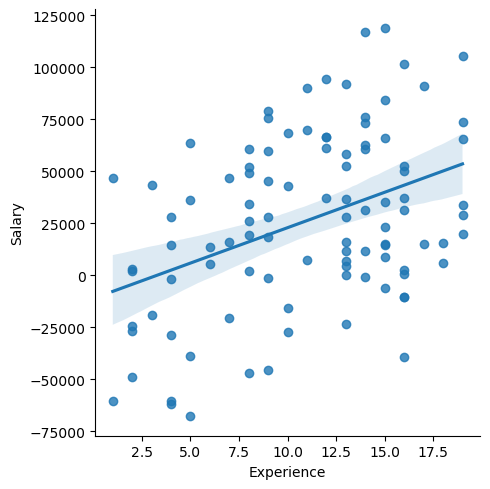

In [251]:
sns.lmplot(data=df, x='Experience', y='Salary')

In [252]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

        Actual  Predicted
83 -27,119.000 22,842.962
53  60,880.000 16,031.619
70    -670.000 36,465.648
45  65,243.000 53,494.005
44     501.000 43,276.990


MAE: Average absolute difference between actual and predicted values. Lower is better.

MSE: Penalizes larger errors more than MAE. Lower is better.

R² Score: Explains how well your model fits the data (ranges from 0 to 1). Higher is better.


In [253]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

Mean Absolute Error (MAE): 34287.080953899494
Mean Squared Error (MSE): 1583997565.4337237
R-squared Score: -0.03274230219993468


## Q1: Can I do linear regression only using Pandas without Scikit-Learn?



In [254]:
mean_x = df['Experience'].mean()
mean_y = df['Salary'].mean()
print(f"{mean_x}, {mean_y}")

10.98, 26180.52


In [255]:
covariance = df.cov().iloc[0, 1]  # Covariance between Experience and Salary
variance = df.var().iloc[0]  # Variance of Experience
print(f"{covariance}, {variance}")

84142.78828282829, 24.706666666666674


In [256]:
m = covariance / variance
b = mean_y - (m * mean_x)
print(f"{m}, {b}")

3405.6714091808526, -11213.75207280576


In [257]:
experience = 10  # Example input
predicted_salary = (m * experience) + b
print(predicted_salary)

22842.962019002767


## multiple linear regression with Pandas

In [259]:
X = df[['Experience', 'Age', 'iq']]  # Multiple independent variables
y = df['Salary']
model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [5086.61552523  -82.6114322  -909.45095278]
Intercept: 74716.40448505965
